<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Bova11_Sell_Buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
from sklearn.ensemble import RandomForestRegressor
import datetime
import matplotlib.pyplot as plt

In [32]:
# Definir o período de dados
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)  # Um ano de dados

In [33]:
# Obter os dados do BOVA11
bova11 = yf.download('BOVA11.SA', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
# Calcular médias móveis
bova11['SMA_21'] = bova11['Close'].rolling(window=21).mean()
bova11['SMA_80'] = bova11['Close'].rolling(window=80).mean()

In [35]:
# Calcular MACD
shortEMA = bova11['Close'].ewm(span=12, adjust=False).mean()
longEMA = bova11['Close'].ewm(span=26, adjust=False).mean()
bova11['MACD'] = shortEMA - longEMA
bova11['Signal Line'] = bova11['MACD'].ewm(span=9, adjust=False).mean()

In [36]:
# Criar coluna para sinal de compra (1) ou venda (-1)
bova11['Signal'] = 0
bova11.loc[bova11['SMA_21'] > bova11['SMA_80'], 'Signal'] = 1  # Compra
bova11.loc[bova11['SMA_21'] < bova11['SMA_80'], 'Signal'] = -1  # Venda


In [37]:
# Calcular alvos
bova11['Target'] = bova11['Close'] * 1.05  # Por exemplo, 5% acima do preço atual

In [38]:
# Converter o índice para datetime
bova11.index = pd.to_datetime(bova11.index)


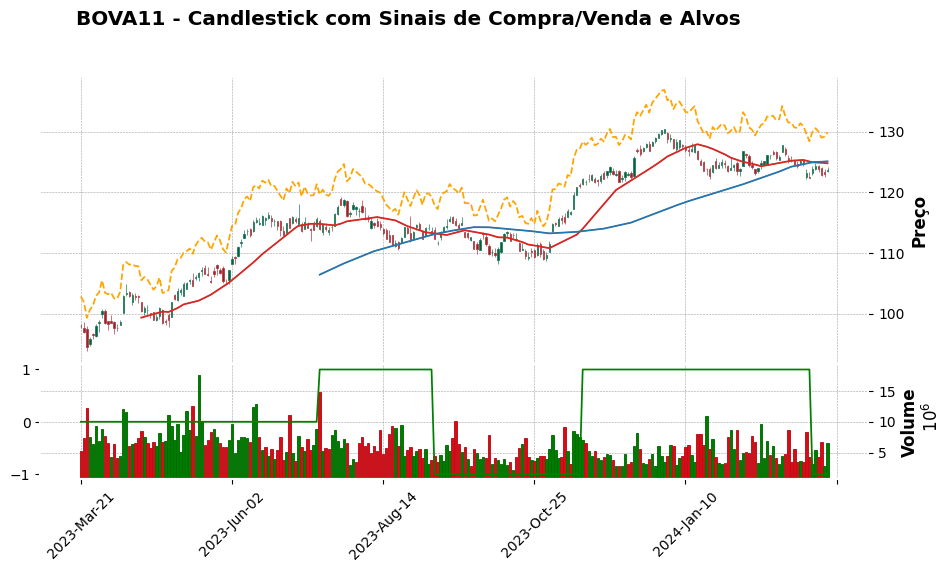

In [39]:
# Plotar os candlesticks com os sinais de compra/venda e alvos destacados
mpf.plot(bova11, type='candle', style='charles', ylabel='Preço', ylabel_lower='Volume',
         volume=True, figratio=(20,10),
         title='BOVA11 - Candlestick com Sinais de Compra/Venda e Alvos',
         mav=(21, 80),
         addplot=[
             mpf.make_addplot(bova11['SMA_21'], color='tab:red'),
             mpf.make_addplot(bova11['SMA_80'], color='tab:blue'),
             mpf.make_addplot(bova11['Target'], color='orange', linestyle='dashed'),
             mpf.make_addplot(bova11['Signal'], panel=1, color='g', markersize=200, marker='^'),
         ]
)

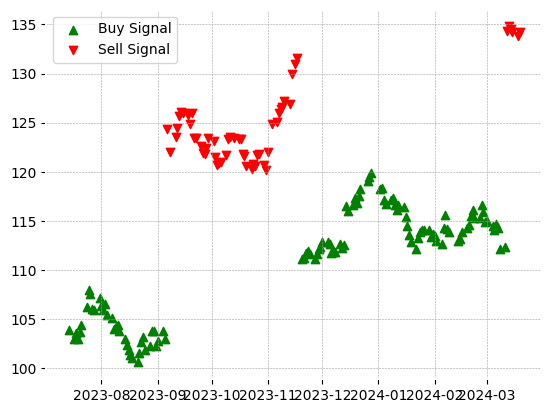

In [40]:
# Adicionar setas para sinais de compra e venda
buy_signals = bova11[bova11['Signal'] == 1]
sell_signals = bova11[bova11['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Low'] - 10, marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['High'] + 10, marker='v', color='red', label='Sell Signal')

plt.legend()
plt.show()